<a href="https://colab.research.google.com/github/rfrod/brl_stocks_outliers/blob/main/stock_outlier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desvio Padrão aplicado à Rentabilidade

##1. Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import seaborn as sns

!pip install investpy --upgrade --no-cache-dir

     |████████████████████████████████| 4.4MB 7.4MB/s 
     |████████████████████████████████| 245kB 52.1MB/s 
     |████████████████████████████████| 6.3MB 52.7MB/s 
     |████████████████████████████████| 512kB 49.2MB/s 
  Created wheel for investpy: filename=investpy-1.0.7-cp37-none-any.whl size=4495223 sha256=be2b4c014b8620474d055934577dd755f382a55e8982faec15f6965142ed7f39
  Stored in directory: /tmp/pip-ephem-wheel-cache-z8hgjdr4/wheels/09/7e/f9/df627561fc57278456e61aa9c63a03dd08e436eb7deab834f0
Successfully built investpy
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
  Found existing installation: pytz 2018.9
    Uninstalling pytz-2018.9:
      Successfully uninstalled pytz-2018.9


##2. Obtendo dados do mercado

Pequena amostra da estrutura de dados do Yahoo

In [2]:
import investpy
#investpy.get_stock_historical_data(stock='bbva', country='spain', from_date='01/01/2010', to_date='01/01/2019')
vale = investpy.get_stock_historical_data('vale3', 'brazil', from_date='01/05/2016', to_date='01/06/2021', order='ascending', interval='Monthly')
vale.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2016-05-01,17.23,17.37,11.68,12.16,166446208,BRL
2016-06-01,12.05,14.84,11.80,13.92,137992704,BRL
2016-07-01,13.95,16.42,13.27,15.82,127396896,BRL
2016-08-01,16.08,16.59,14.40,14.49,129655800,BRL
2016-09-01,14.58,15.76,13.82,15.23,103533600,BRL


Adding % Variation column

In [6]:
vale.loc[vale.first_valid_index(),'Var%'] = 0

for i in range(1, len(vale)):
  vale.iloc[i, vale.columns.get_loc('Var%')] = (vale.iloc[i]['Close'] / vale.iloc[i-1]['Close'] - 1) 
  
vale.tail()

,Open,High,Low,Close,Volume,Currency,Var%
Date,,,,,,,
2021-02-01,90.01,98.95,87.51,94.52,550701504,BRL,0.074702
2021-03-01,91.86,101.93,90.61,97.97,672158976,BRL,0.036500
2021-04-01,98.50,112.95,96.13,109.02,453237184,BRL,0.112790
2021-05-01,109.70,120.45,106.03,114.78,587384128,BRL,0.052834
2021-06-01,114.73,115.71,102.87,113.25,533956096,BRL,-0.013330


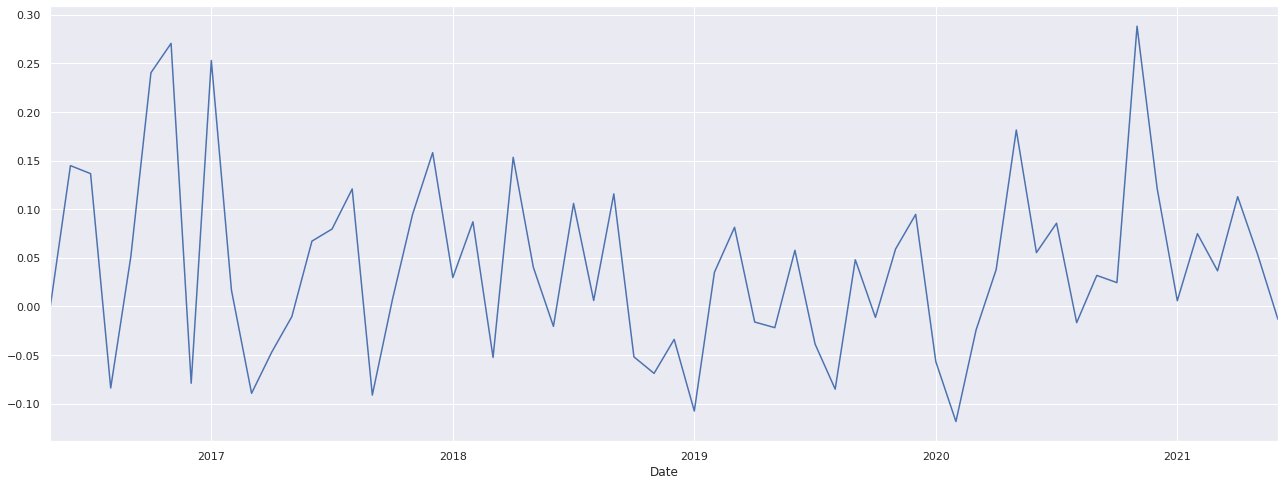

In [7]:
sns.set()
vale['Var%'].plot(figsize=(22,8))

In [8]:
media = vale['Var%'].mean()
desvio = vale['Var%'].std()

print('Média', media)
print('Desvio', desvio)
vale_hj = investpy.get_stock_historical_data('vale3', 'brazil', from_date='24/06/2021', to_date='25/06/2021')['Close']

print(vale_hj)

Média 0.04062766847298615
Desvio 0.09307340298672896
Date
2021-06-24    111.03
2021-06-25    112.40
Name: Close, dtype: float64


In [9]:
print('Preço atual: ', vale_hj['2021-06-25'])
print('Preço ontem: ', vale.loc[vale.last_valid_index()]['Close'])
print('Média',  round(media*100,2), '%')
print('Desvio',  round(desvio*100,2), '%')
print('D-3: ', vale.loc[vale.last_valid_index()]['Close'] * (1 + (media - 3 * desvio)))
print('D-2: ', vale.loc[vale.last_valid_index()]['Close'] * (1 + (media - 2 * desvio)))
print('D+2: ', vale.loc[vale.last_valid_index()]['Close'] * (1 + (media + 2 * desvio)))
print('D+3: ', vale.loc[vale.last_valid_index()]['Close'] * (1 + (media + 3 * desvio)))


var_hj = (vale_hj['2021-06-25'] / vale.loc[vale.last_valid_index()]['Close'] - 1) * 100
print('Var% Hoje:', var_hj)


Preço atual:  112.4
Preço ontem:  113.25
Média 4.06 %
Desvio 9.31 %
D-3:  86.22939478982452
D-2:  96.76995767807158
D+2:  138.9322092310598
D+3:  149.47277211930685
Var% Hoje: -0.7505518763796903


### Lista das Ações para verificação

In [10]:
stocks = ['ABEV3.SA', 
          'B3SA3.SA',
          'BBAS3.SA',
          'BBDC3.SA',
          'BBSE3.SA',
          'BOVA11.SA',
          'BRFS3.SA',
          'BRKM5.SA',
          'BRML3.SA',
          'CCRO3.SA',
          'CIEL3.SA',
          'CMIG4.SA',
          'COGN3.SA',
          'CSAN3.SA',
          'CSNA3.SA',
          'CYRE3.SA',
          'ECOR3.SA',
          'EGIE3.SA',
          'ELET3.SA',
          'EMBR3.SA',
          'EQTL3.SA',
          'GGBR4.SA',
          'GOAU4.SA',
          'HYPE3.SA',
          'IRBR3.SA',
          'ITSA4.SA',
          'ITUB4.SA',
          'JBSS3.SA',
          'LAME4.SA',
          'LREN3.SA',
          'MGLU3.SA',
          'MRFG3.SA',
          'NTCO3.SA',
          'PETR4.SA',
          'QUAL3.SA',
          'RADL3.SA',
          'RAIL3.SA',
          'RENT3.SA',
          'SBSP3.SA',
          'SUZB3.SA',
          'TAEE11.SA',
          'USIM5.SA',
          'VALE3.SA',
          'VIVT3.SA',
          'VVAR3.SA',
          'WEGE3.SA',
          'YDUQ3.SA']

### 3. Função para checar outliers

* stock - String com o Ticker
* years - Número com a quantidade de anos para baixar
* d1 - Número de desvios padrão do 1o range
* d2 - Número de desvios padrão do 2o range
* verbose - imprimir os dados de cada ativo

In [11]:
import datetime

def check_outlier(stock,years=5, d1 = 1, d2 =2, verbose=False):
  today = datetime.date.today()
  first = today.replace(day=1)
  lastMonth = first - datetime.timedelta(days=1)
  today_str = lastMonth.strftime("%d/%m/%Y")
  today_3 = today - datetime.timedelta(days=years*365)
  today_3_str = today_3.strftime("%d/%m/%Y")

  stock_data = investpy.get_stock_historical_data(stock, 'brazil', from_date=today_3_str, to_date=today_str, order='ascending', interval='Monthly')

  stock_data.loc[stock_data.first_valid_index(),'Var%'] = 0

  for i in range(1, len(stock_data)):
    stock_data.iloc[i, stock_data.columns.get_loc('Var%')] = (stock_data.iloc[i]['Close'] / stock_data.iloc[i-1]['Close'] - 1) 
  
  media = stock_data['Var%'].mean()
  desvio = stock_data['Var%'].std()

  stock_hj = investpy.get_stock_historical_data(stock, 'brazil', from_date=(today- datetime.timedelta(days=1)).strftime("%d/%m/%Y"), to_date=today.strftime("%d/%m/%Y"))['Close']
  d__ = stock_data.loc[stock_data.last_valid_index()]['Close'] * (1 + (media - d2 * desvio))
  d_ = stock_data.loc[stock_data.last_valid_index()]['Close'] * (1 + (media - d1 * desvio))
  dd = stock_data.loc[stock_data.last_valid_index()]['Close'] * (1 + (media + d1 * desvio))
  ddd = stock_data.loc[stock_data.last_valid_index()]['Close'] * (1 + (media + d2 * desvio))

  if verbose:
    print('Preço atual: ', stock_hj[stock_hj.last_valid_index()])
    print('Preço anterior: ', stock_data.loc[stock_data.last_valid_index()]['Close'])
    print('Média',  round(media*100,2), '%')
    print('Desvio',  round(desvio*100,2), '%')
    print('D-- (', round((media - d2 * desvio)*100,2), '%):', round(d__,2))
    print('D- (', round((media - d1 * desvio)*100,2), '%):', round(d_,2))
    print('D+ (', round((media + d1 * desvio)*100,2), '%):', round(dd,2))
    print('D++ (', round((media + d2 * desvio)*100,2), '%):', round(ddd,2))
    var_hj = (stock_hj[stock_hj.last_valid_index()] / stock_data.loc[stock_data.last_valid_index()]['Close'] - 1) * 100
    print('Var% Hoje:', var_hj)

  if stock_hj[stock_hj.last_valid_index()] <= d__:
    print('--',stock)
  elif stock_hj[stock_hj.last_valid_index()] <= d_:
    print('-',stock)

  if stock_hj[stock_hj.last_valid_index()] >= ddd:
    print('++',stock)
  elif stock_hj[stock_hj.last_valid_index()] >= dd:
    print('+',stock)

### 4. Check

In [12]:
for stock in stocks:
  try:
    check_outlier(stock.replace(".SA", ""), d1=1.5)
  except:
    print(stock,'not found.')

BOVA11.SA not found.
NTCO3.SA not found.


In [14]:
check_outlier('jbss3', d1 = 1.5, verbose=True)

Preço atual:  28.96
Preço anterior:  29.1
Média 2.21 %
Desvio 11.7 %
D-- ( -21.19 %): 22.93
D- ( -15.34 %): 22.93
D+ ( 19.76 %): 34.85
D++ ( 25.6 %): 36.55
Var% Hoje: -0.4810996563573866
